# Overview
This jupyter notebook covers the following contents:
1. Default configuration in LIBERO
2. Basic information about available LIBERO benchmarks
   - Get a dictionary of mapping from benchmark name to benchmark class
   - Check the integrity of benchmarks
   - Check the integrity of init files
   - Visualize all the init states of a task
   - Download datasets
   - Get information about a demonstration file and replay a trajectory


In [1]:
from libero.libero import benchmark, get_libero_path, set_libero_default_path
import os
from termcolor import colored

/home/zuxin/anaconda3/envs/libero/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Default file paths

All the paths are retrieved from a yaml config file located at `~/.libero/config.yaml`. And the default paths are set to relative to the libero codebase.

In [2]:
benchmark_root_path = get_libero_path("benchmark_root")
init_states_default_path = get_libero_path("init_states")
datasets_default_path = get_libero_path("datasets")
bddl_files_default_path = get_libero_path("bddl_files")
print("Default benchmark root path: ", benchmark_root_path)
print("Default dataset root path: ", datasets_default_path)
print("Default bddl files root path: ", bddl_files_default_path)

Default benchmark root path:  /home/zuxin/repo/LIBERO/libero/libero
Default dataset root path:  /home/zuxin/repo/LIBERO/libero/libero/../datasets
Default bddl files root path:  /home/zuxin/repo/LIBERO/libero/libero/./bddl_files


Now if you want to point your codebase to custom path, you can use `set_libero_path` function to do that. Notice that all the paths change according to `benchmark_root` value.

In [4]:
set_libero_default_path(os.path.join(os.path.expanduser("~"), "custom_project"))
benchmark_root_path = get_libero_path("benchmark_root")
init_states_default_path = get_libero_path("init_states")
datasets_default_path = get_libero_path("datasets")
bddl_files_default_path = get_libero_path("bddl_files")
print("Default benchmark root path: ", benchmark_root_path)
print("Default dataset root path: ", datasets_default_path)
print("Default bddl files root path: ", bddl_files_default_path)

# If nothing is specified in the `set_libero_default_path` function, the path will be changed back to the default path
# We will set back the path to the default path for the subsequent examples
set_libero_default_path()
benchmark_root_path = get_libero_path("benchmark_root")
init_states_default_path = get_libero_path("init_states")
datasets_default_path = get_libero_path("datasets")
bddl_files_default_path = get_libero_path("bddl_files")
print("Default benchmark root path: ", benchmark_root_path)
print("Default dataset root path: ", datasets_default_path)
print("Default bddl files root path: ", bddl_files_default_path)

[Warning] You are changing the default path for Libero config. This will affect all the paths in the config file.
[Warning]: assets path /home/zuxin/custom_project/./assets does not exist!
[Warning]: bddl_files path /home/zuxin/custom_project/./bddl_files does not exist!
[Warning]: benchmark_root path /home/zuxin/custom_project does not exist!
[Warning]: datasets path /home/zuxin/custom_project/../datasets does not exist!
[Warning]: init_states path /home/zuxin/custom_project/./init_files does not exist!
[Warning]: assets path /home/zuxin/custom_project/./assets does not exist!
[Warning]: bddl_files path /home/zuxin/custom_project/./bddl_files does not exist!
[Warning]: benchmark_root path /home/zuxin/custom_project does not exist!
[Warning]: datasets path /home/zuxin/custom_project/../datasets does not exist!
[Warning]: init_states path /home/zuxin/custom_project/./init_files does not exist!
[Warning]: assets path /home/zuxin/custom_project/./assets does not exist!
[Warning]: bddl_fil

# 2. See available benchmarks

### 2.1 Get a dictionary of mapping from benchmark name to benchmark class

In [5]:
benchmark_dict = benchmark.get_benchmark_dict()
print(benchmark_dict)

{'libero_spatial': <class 'libero.libero.benchmark.LIBERO_SPATIAL'>, 'libero_object': <class 'libero.libero.benchmark.LIBERO_OBJECT'>, 'libero_goal': <class 'libero.libero.benchmark.LIBERO_GOAL'>, 'libero_90': <class 'libero.libero.benchmark.LIBERO_90'>, 'libero_10': <class 'libero.libero.benchmark.LIBERO_10'>, 'libero_100': <class 'libero.libero.benchmark.LIBERO_100'>}


### 2.2 Check the integrity of benchmarks

In [6]:
# initialize a benchmark
benchmark_instance = benchmark_dict["libero_10"]()
num_tasks = benchmark_instance.get_num_tasks()
# see how many tasks involved in the benchmark
print(f"{num_tasks} tasks in the benchmark {benchmark_instance.name}: ")

# Check if all the task names and their bddl file names
task_names = benchmark_instance.get_task_names()
print("The benchmark contains the following tasks:")
for i in range(num_tasks):
    task_name = task_names[i]
    task = benchmark_instance.get_task(i)
    bddl_file = os.path.join(bddl_files_default_path, task.problem_folder, task.bddl_file)
    print(f"\t {task_name}, detail definition stored in {bddl_file}")
    if not os.path.exists(bddl_file):
        print(colored(f"[error] bddl file {bddl_file} cannot be found. Check your paths", "red"))

[info] using task orders [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10 tasks in the benchmark libero_10: 
The benchmark contains the following tasks:
	 LIVING_ROOM_SCENE2_put_both_the_alphabet_soup_and_the_tomato_sauce_in_the_basket, detail definition stored in /home/zuxin/repo/LIBERO/libero/libero/./bddl_files/libero_10/LIVING_ROOM_SCENE2_put_both_the_alphabet_soup_and_the_tomato_sauce_in_the_basket.bddl
	 LIVING_ROOM_SCENE2_put_both_the_cream_cheese_box_and_the_butter_in_the_basket, detail definition stored in /home/zuxin/repo/LIBERO/libero/libero/./bddl_files/libero_10/LIVING_ROOM_SCENE2_put_both_the_cream_cheese_box_and_the_butter_in_the_basket.bddl
	 KITCHEN_SCENE3_turn_on_the_stove_and_put_the_moka_pot_on_it, detail definition stored in /home/zuxin/repo/LIBERO/libero/libero/./bddl_files/libero_10/KITCHEN_SCENE3_turn_on_the_stove_and_put_the_moka_pot_on_it.bddl
	 KITCHEN_SCENE4_put_the_black_bowl_in_the_bottom_drawer_of_the_cabinet_and_close_it, detail definition stored in /home/zuxin/repo/LI

### 2.3 Check the integrity of init files

In [7]:
# Check if all the init states files exist for tasks
task_names = benchmark_instance.get_task_names()
print("The benchmark contains the following tasks:")
for i in range(num_tasks):
    task_name = task_names[i]
    task = benchmark_instance.get_task(i)
    init_states_path = os.path.join(init_states_default_path, task.problem_folder, task.init_states_file)
    if not os.path.exists(init_states_path):
        print(colored(f"[error] the init states {init_states_path} cannot be found. Check your paths", "red"))
print(f"An example of init file is named like this: {task.init_states_file}")

# Load torch init files
init_states = benchmark_instance.get_task_init_states(0)
# Init states in the same (num_init_rollouts, num_simulation_states)
print(init_states.shape)


The benchmark contains the following tasks:
An example of init file is named like this: KITCHEN_SCENE6_put_the_yellow_and_white_mug_in_the_microwave_and_close_it.pruned_init
(50, 123)


### 2.4 Visualize all the init states of a task

[robosuite WARNING] No private macro file found! (__init__.py:7)
[robosuite WARNING] It is recommended to use a private macro file (__init__.py:8)
[robosuite WARNING] To setup, run: python /home/zuxin/anaconda3/envs/libero/lib/python3.8/site-packages/robosuite/scripts/setup_macros.py (__init__.py:9)


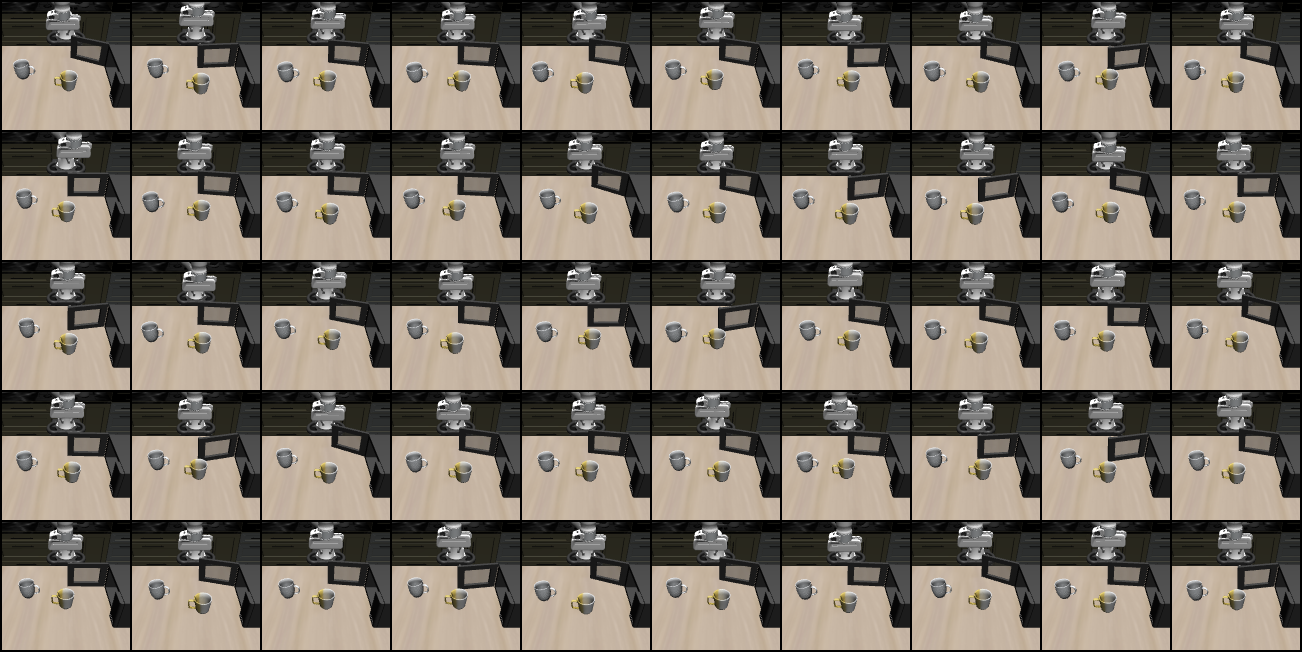

In [8]:
from libero.libero.envs import OffScreenRenderEnv
from IPython.display import display
from PIL import Image

import torch
import torchvision

# task_id is the (task_id + 1)th task in the benchmark
task_id = 9
task = benchmark_instance.get_task(task_id)

env_args = {
    "bddl_file_name": os.path.join(bddl_files_default_path, task.problem_folder, task.bddl_file),
    "camera_heights": 128,
    "camera_widths": 128
}

env = OffScreenRenderEnv(**env_args)


init_states = benchmark_instance.get_task_init_states(task_id)

# Fix random seeds for reproducibility
env.seed(0)

def make_grid(images, nrow=8, padding=2, normalize=False, pad_value=0):
    """Make a grid of images. Make sure images is a 4D tensor in the shape of (B x C x H x W)) or a list of torch tensors."""
    grid_image = torchvision.utils.make_grid(images, nrow=nrow, padding=padding, normalize=normalize, pad_value=pad_value).permute(1, 2, 0)
    return grid_image

images = []
env.reset()
for eval_index in range(len(init_states)):
    env.set_init_state(init_states[eval_index])

    for _ in range(5):
        obs, _, _, _ = env.step([0.] * 7)
    images.append(torch.from_numpy(obs["agentview_image"]).permute(2, 0, 1))

# # images = torch.stack(images, dim=0).permute(0, 3, 1, 2)
# print(images.shape)
grid_image = make_grid(images, nrow=10, padding=2, pad_value=0)
display(Image.fromarray(grid_image.numpy()[::-1]))
env.close()

### 2.5 Download datasets

In [9]:
import libero.libero.utils.download_utils as download_utils

download_dir = get_libero_path("datasets")
datasets = "libero_spatial" # Can specify "all", "libero_goal", "libero_spatial", "libero_object", "libero_100"

libero_datasets_exist = download_utils.check_libero_dataset(download_dir=download_dir)

if not libero_datasets_exist:
    download_utils.libero_dataset_download(download_dir=download_dir, datasets=datasets)

# Check if the demo files exist
demo_files = [os.path.join(datasets_default_path, benchmark_instance.get_task_demonstration(i)) for i in range(num_tasks)]
for demo_file in demo_files:
    if not os.path.exists(demo_file):
        print(colored(f"[error] demo file {demo_file} cannot be found. Check your paths", "red"))

[ ] Dataset libero_object not found!!!
[ ] Dataset libero_goal not found!!!
[X] Dataset libero_spatial is complete
[X] Dataset libero_10 is complete
[X] Dataset libero_90 is complete


04k94hyizn4huhbv5sz4ev9p2h1p6s7f.zip: 2.88GB [02:56, 16.3MB/s]                            


### 2.6 Get information about a demonstration file and replay a trajectory

In [10]:
import h5py
from libero.libero.utils.dataset_utils import get_dataset_info
from IPython.display import HTML
import imageio

example_demo_file = demo_files[9]
# Print the dataset info. We have a standalone script for doing the same thing available at `scripts/get_dataset_info.py`
get_dataset_info(example_demo_file)

with h5py.File(example_demo_file, "r") as f:
    images = f["data/demo_0/obs/agentview_rgb"][()]

video_writer = imageio.get_writer("output.mp4", fps=60)
for image in images:
    video_writer.append_data(image[::-1])
video_writer.close()

HTML("""
    <video width="640" height="480" controls>
        <source src="output.mp4" type="video/mp4">
    </video>
    <script>
        var video = document.getElementsByTagName('video')[0];
        video.playbackRate = 2.0; // Increase the playback speed to 2x
        </script>    
""")


total transitions: 15232
total trajectories: 50
traj length mean: 304.64
traj length std: 46.59989699559432
traj length min: 224
traj length max: 449
action min: -1.0
action max: 1.0
language instruction: put the yellow and white mug in the microwave and close it

==== Filter Keys ====
no filter keys


==== Env Meta ====
{
    "type": 1,
    "env_name": "Libero_Kitchen_Tabletop_Manipulation",
    "problem_name": "libero_kitchen_tabletop_manipulation",
    "bddl_file": "chiliocosm/bddl_files/libero_100/KITCHEN_SCENE6_put_the_yellow_and_white_mug_in_the_microwave_and_close_it.bddl",
    "env_kwargs": {
        "robots": [
            "Panda"
        ],
        "controller_configs": {
            "type": "OSC_POSE",
            "input_max": 1,
            "input_min": -1,
            "output_max": [
                0.05,
                0.05,
                0.05,
                0.5,
                0.5,
                0.5
            ],
            "output_min": [
                -0.0

### 2.7 Concate multiple datasets for multit-task training

In [11]:
from torch.utils.data import ConcatDataset, Dataset
from libero.lifelong.datasets import get_dataset, SequenceVLDataset

num_tasks = benchmark_instance.get_num_tasks()
print(f"Number of tasks in the benchmark {benchmark_instance.name}: {num_tasks}")

# manip_datasets = []
# for demo_file in demo_files:
#     task_i_dataset, shape_meta = get_dataset(
#             dataset_path=os.path.join(cfg.folder,
#                                         benchmark.get_task_demonstration(i)),
#             obs_modality=cfg.data.obs.modality,
#             initialize_obs_utils=(i==0),
#             seq_len=cfg.data.seq_len)    
#     manip_datasets.append()

# concat_dataset = ConcatDataset([get_dataset(demo_file) for demo_file in demo_files])

Number of tasks in the benchmark libero_10: 10


### 2.8 Create datasets for Experience Replay algorithm

In the algorithm of ER, we need to sample data from both dataset of the current task and data from previous experiences. To this end, a specific implementation is needed (`TruncatedSequenceDataset`).